<a href="https://colab.research.google.com/github/sera0911/asia_ai_study/blob/main/New_MachinLearning/exam_02_principles_of_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# principles_of_learning 
학습이 어떻게 이루어지는지 살펴보기

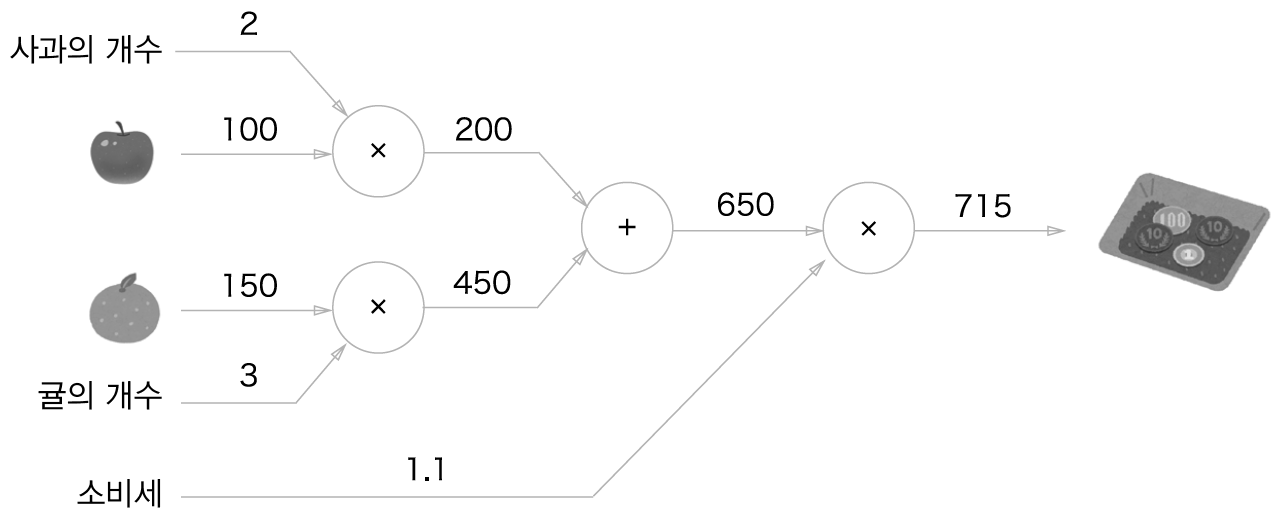

#### 위 그림의 계산을 머신러닝으로 나타내기

In [1]:
#더하기 클래스 만들기

class add_graph:
    def __init__(self):  #생성자 함수(초기값을 설정해주고, 변수 위치를 지정해준다)
        pass
    def forward(self, x, y):  #앞에서부터 계산해서 forward, 뒤에서 부터 계산해서(미분으로) backward
        out = x + y
        return out
    def backward(self, dout):  #미분을 위해 추가한 함수, 덧셈을 미분하면 1이 나온다
        dx = 1 * dout  #x에 대한 미분은 1
        dy = 1 * dout  #y에 대한 미분은 1
        return dx, dy

In [2]:
#곱하기 클래스 만들기

class mul_graph:
    def __init__(self):
        self.x = None  #x, y는 아래 backward에서 사용하기 위해 지정
        self.y = None
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    def backward(self, dout):  #미분을 위해 추가한 함수
        dx = self.y * dout  #x에 대한 미분은 y
        dy = self.x * dout  #y에 대한 미분은 x
        return dx, dy

In [3]:
#mse 미분구하는 클래스 만들기

class mse_graph:
    def __init__(self):
        self.loss = None  #오차값 생성
        self.y = None  #y=결과값
        self.t = None  #t=타겟
        self.x = None  #x=피쳐

    def forward(self, y, t):  #forward는 mse값을 구해주는 함수, backward는 미분해주는 함수, t=target값(정답데이터), y =결과값(예측값)
        self.t = t
        self.y = y
        self.loss = np.square(self.t - self.y).sum() / self.t.shape[0]  #square=제곱
        return self.loss
    def backward(self, x, dout=1):
        data_size = self.t.shape[0] 
        dweight_mse = (((self.y - self.t) * x).sum() * 2 / data_size)  #세타에 대한 미분
        dbias_mse = (self.y - self.t).sum() * 2 / data_size  #상수에 대한 미분
        return dweight_mse, dbias_mse

mse 미분을 아래식을 사용해서 적용해준 것

dweight_mse

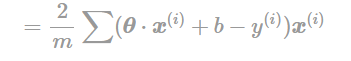

dbias_mse

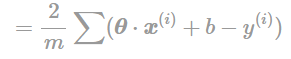

In [4]:
#변수 지정

apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

In [5]:
#그래프 연산자 적용하기

mul_apple_graph = mul_graph()
mul_orange_graph = mul_graph()
add_apple_orange_graph = add_graph()
mul_tax_graph = mul_graph()

In [6]:
#계산식 만들기

#사과가격
apple_price = mul_apple_graph.forward(
    apple, apple_num)

#오렌지가격
orange_price = mul_orange_graph.forward(
    orange, orange_num)

#과일 가격의 합
all_price = add_apple_orange_graph.forward(
    apple_price, orange_price)

#세금을 합친 총 값
total_price = mul_tax_graph.forward(
    all_price, tax)

print(total_price)

#715.0000000000001 에서 뒤 000000000001은 float쓸 때 나오는 값(무시해도 된다)

715.0000000000001


#### 나온 결과 값을 미분하기
why? 입력값이 최종 출력에 얼마나 영향을 주는지 알아보며 조금씩 수정하기 위해서

In [7]:
#상수를 미분하면 0이라서 dout에 1을 넣어준다

#총 가격을 미분
dprice = 1

dall_price, dtax = mul_tax_graph.backward(dprice)

dapple_price, dorange_price = add_apple_orange_graph.backward(dall_price)

dorange, dorange_num = mul_orange_graph.backward(dorange_price)

dapple, dapple_num = mul_apple_graph.backward(dapple_price)

print('dApple', dapple)
print('dApple_num', dapple_num)
print('dOrange', dorange)
print('dOrange_num', dorange_num)

dApple 2.2
dApple_num 110.00000000000001
dOrange 3.3000000000000003
dOrange_num 165.0


갯수, 가격에 영향을 미치는 정도

dApple 2.2   -> 가격을 1만큼 올리면 2.2만큼 늘어난다  

dApple_num 110.00000000000001  -> 사과 개수를 1을 늘리면 110만큼 늘어난다

dOrange 3.3000000000000003  -> 오렌지 개수를 1을 늘리면 3.3만큼 늘어난다

dOrange_num 165.0  -> 가격을 1만큼 올리면 165만큼 늘어난다

### 계산그래프를 이용해 섭씨온도를 화씨온도로 변화시키는 머신러닝 만들기

bias 1.8과 kernel 0.32 와의 격차가 얼마나 나는지 알아서 조정하기

In [8]:
import numpy as np

In [9]:
def celsius_to_fahrenheit(x):
    return x * 1.8 + 32

In [10]:
weight_graph = mul_graph()  #weight = HDFView프로그램 kernel = 기울기
bias_graph = add_graph()    #bais = HDFView프로그램 bias = 상수항

In [11]:
weight = np.random.uniform(0, 5, 1)   #random.uniform(0, 5, 1) 0에서 5사이의 값이 1개나오는데, 나올 확률이 동일하다
print(weight)
bias = 0
data_C = np.array(range(0 ,100))  #0, 100까지 나열
data_F = celsius_to_fahrenheit(data_C)
scaled_data_C = data_C / 100  #정규화
scaled_data_F = data_F / 100  #정규화, 타겟값
print(scaled_data_C)
print(scaled_data_F)

[3.71561515]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.32  0.338 0.356 0.374 0.392 0.41  0.428 0.446 0.464 0.482 0.5   0.518
 0.536 0.554 0.572 0.59  0.608 0.626 0.644 0.662 0.68  0.698 0.716 0.734
 0.752 0.77  0.788 0.806 0.824 0.842 0.86  0.878 0.896 0.914 0.932 0.95
 0.968 0.986 1.004 1.022 1.04  1.058 1.076 1.094 1.112 1.13  1.148 1.166
 1.184 1.202 1.22  1.238 1.256 1.274 1.292 1.31  1.328 1.346 1.364 1.382
 1.4   1.418 1.436 1.454 1.472 1.49  1.508 1.526 1.544 1.562 1.58  1.598
 1.616 1.634 1.652 1.67  1.688 1.706 1.72

In [12]:
#계산 (틀린값들이 나온다<랜덤하게 만들어진 수여서 이제 조정해가면서 맞춰야한다>)

weighted_data = weight_graph.forward(weight, scaled_data_C)

predict_data = bias_graph.forward(weighted_data, bias)

print(predict_data)  #예측데이터

[0.         0.03715615 0.0743123  0.11146845 0.14862461 0.18578076
 0.22293691 0.26009306 0.29724921 0.33440536 0.37156151 0.40871767
 0.44587382 0.48302997 0.52018612 0.55734227 0.59449842 0.63165457
 0.66881073 0.70596688 0.74312303 0.78027918 0.81743533 0.85459148
 0.89174764 0.92890379 0.96605994 1.00321609 1.04037224 1.07752839
 1.11468454 1.1518407  1.18899685 1.226153   1.26330915 1.3004653
 1.33762145 1.3747776  1.41193376 1.44908991 1.48624606 1.52340221
 1.56055836 1.59771451 1.63487066 1.67202682 1.70918297 1.74633912
 1.78349527 1.82065142 1.85780757 1.89496372 1.93211988 1.96927603
 2.00643218 2.04358833 2.08074448 2.11790063 2.15505679 2.19221294
 2.22936909 2.26652524 2.30368139 2.34083754 2.37799369 2.41514985
 2.452306   2.48946215 2.5266183  2.56377445 2.6009306  2.63808675
 2.67524291 2.71239906 2.74955521 2.78671136 2.82386751 2.86102366
 2.89817981 2.93533597 2.97249212 3.00964827 3.04680442 3.08396057
 3.12111672 3.15827287 3.19542903 3.23258518 3.26974133 3.30689

In [13]:
dout = 1
dbias, dbiased_data = bias_graph.backward(dout)  #미분은 뒤에서 부터 계산해서 backward
dweight, dbiased_data_C = weight_graph.backward(dbiased_data)
print(dbias)  #dbias =1
print(dweight)  #100개의 값이 나온다

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


원하는 값은 => 100개의 랜덤값과 100개의 웨이트 값을 곱하고 dbias의 값을 더한 뒤 scaled_data_F를 빼서 오차구하기

방식은 => 제곱을 해서 다 더하고 평균을 내기 = 에러를 제곱해서 평균을 냄 = mse

에러는 1.8이 아닐시에 에러가 난다(1.8에서는 에러가 0이므로 mse=0)   
-> 그러므로 1.8보다 작으면 1.8과 가까워지게 오른쪽으로 수정, 1.8이 넘으면 1.8과 가까워지게 왼쪽으로 수정

In [14]:
#mse미분값 구하기

mseGraph = mse_graph()
mse = mseGraph.forward(predict_data, scaled_data_F)  #scaled_data_F =t (정답값)
print(mse)

#결과값은 weight가 랜덤으로 만들어서 다르게 나온다

0.7004401711681654


In [15]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)   #scaled_data_C = x값
print(weight_mse_gradient)
print(bias_mse_gradient)

0.9411844669416662
1.2564589953894467


In [16]:
learning_rate = 0.1  #기울기를 조금씩 옮겨야 해서 0.1로 지정해준다
learned_weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
print('before laerning weight : ', weight)
print('after learning weight : ', learned_weight)

#결과 숫자가 더 커짐 => bias값 때문에

before laerning weight :  [3.71561515]
after learning weight :  [3.66902652]



```
learning_rate = 0.1
learned_weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
print('before laerning weight : ', weight)
print('after learning weight : ', learned_weight)
```

이 코드가 1번 돌면, 모델 학습에서 fit(epoch=1)번에 해당된다


In [17]:
learned_bias = bias - learning_rate * bias_mse_gradient * dbias
print('before laerning bias : ', bias)
print('after learning bias : ', learned_bias)   

#결과 -쪽으로 더 멀어짐

before laerning bias :  0
after learning bias :  -0.12564589953894467


In [18]:
#epoch=1000번을 하는 과정을 for문을 이용해서 실행해보기
#오차값, weight, bias 들이 for문안에서 수행될 때 값들을 저장하기위해 리스트로 만듬

error_list = []
weight_list = []
bias_list = []

for i in range(1000):
    #forward
    weighted_data = weight_graph.forward(weight, scaled_data_C)
    predict_data = bias_graph.forward(weighted_data, bias)

    #backward
    dout = 1
    dbias, dbiased_data = bias_graph.backward(dout)
    dweight, dbiased_data_C = weight_graph.backward(dbiased_data)

    #mse
    mse = mseGraph.forward(predict_data, scaled_data_F)
    error_list.append(mse)
    weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
    weight_list.append(weight)  #초기값 저장
    weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
    bias_list.append(bias)   #초기값 저장
    bias = bias - learning_rate * bias_mse_gradient * dbias

weight_list.append(weight)  #for문을 돌면서 더해지는 weight값 리스트형태로 지정
bias_list.append(bias)   #for문을 돌면서 더해지는 bias값 리스트형태로 지정
print(weight)
print(bias)

#결과 [1.80121056]
#결과 0.319377987964333

[1.80113073]
0.31941900417890534


In [19]:
print(error_list[-1])  #error_list의 마지막 값

1.0857353605512806e-07


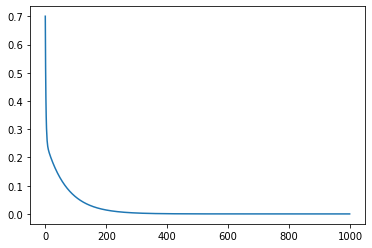

In [20]:
#error_list 시각화

import matplotlib.pyplot as plt

plt.plot(error_list)
plt.show()

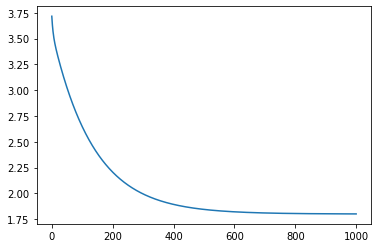

In [21]:
#weight_list 시각화

plt.plot(weight_list)
plt.show()

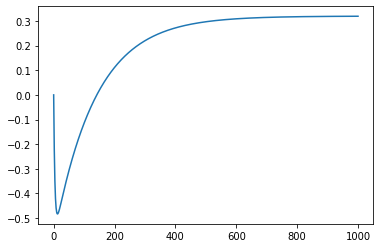

In [22]:
#bias_list 시각화

plt.plot(bias_list)
plt.show()

#처음엔 weight값이 더 영향을 끼치기 때문에 다시 내려갔다가 올라간다